# Quantitative approach to topology generators

Tanya Strydom [](https://orcid.org/0000-0001-6067-1349)  
April 11, 2024

I think in the long run I will probably turn the other repo ([BecksLab/topology_generators](https://github.com/BecksLab/topology_generators)) into a project that we can then access and I will port all of the working code here… I think it will just come down to what the ‘cost’ is of the computational side of things and how convoluted it might end up looking.

Anyway so for now I am just pulling in the INTERIM data from some of the models. This uses (for now) 20 mangal \[@poisotMangalMakingEcological2016\] datasets and just generates some networks for using the niche and cascade models. The ‘results’ for now is just counting the number of links each model generates for each network because that’s what my brain decided on doing…

In [ ]:
#| include: false
#| warning: false
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Joining with `by = join_by(id)`

From a data transformation perspective instead of looking at the raw number of ‘top’ (zero vulnerability) and ‘bottom’ (zero generality) species we can instead look at the ratio of top:bottom. A small (\< 1) number will thus be indicative of a ‘bottom-heavy’ network and the opposite for larger numbers

Lets start by summarising the ‘raw’ data as box plots just to see what it looks like before we calculate the Z scores

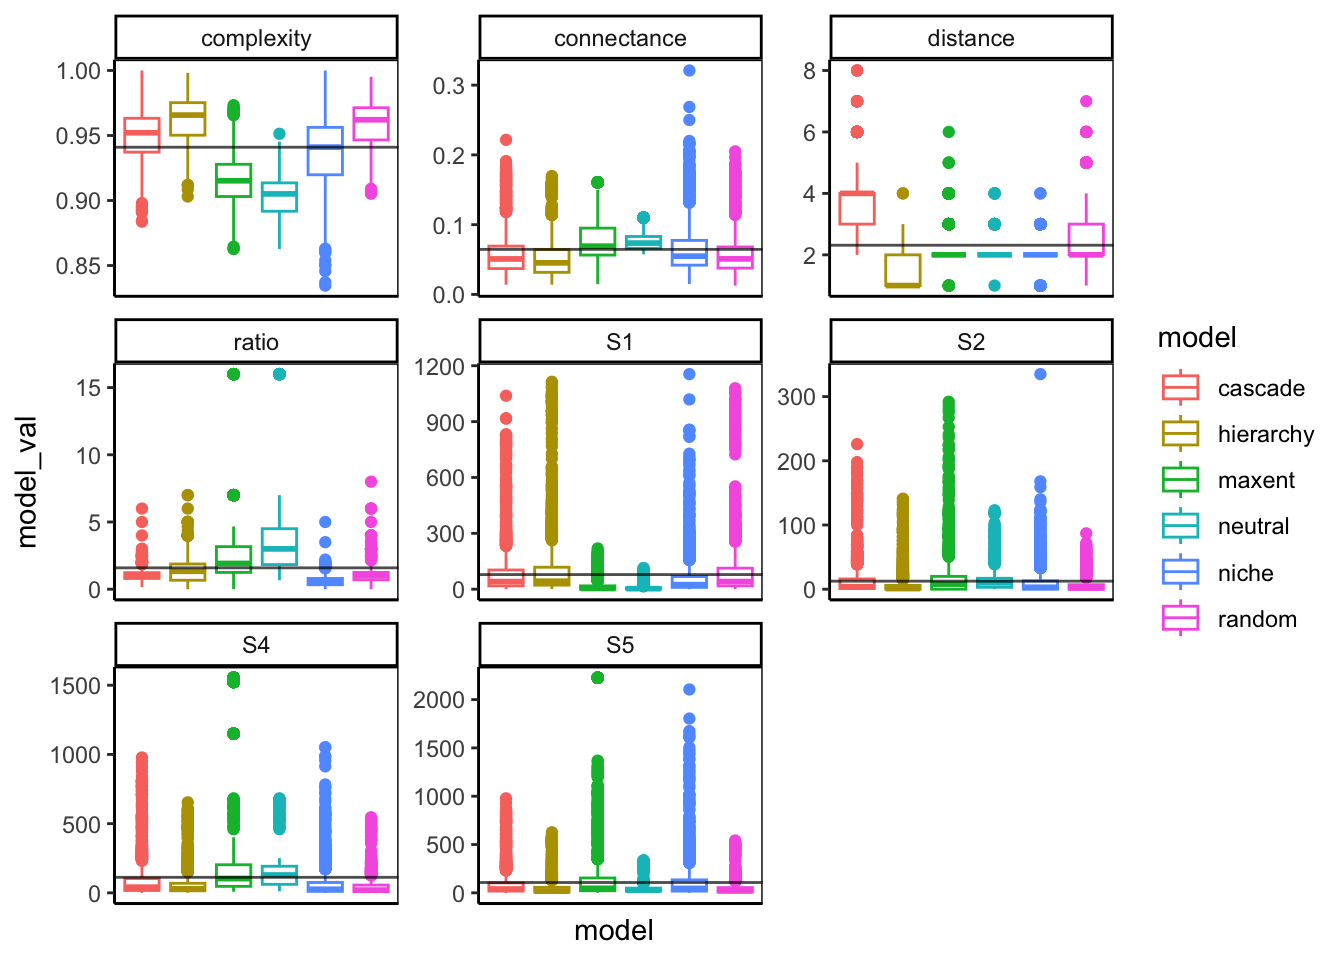

In [ ]:
#| warning: false
#| echo: false
#| label: fig-boxplot
#| fig-cap: "Boxplot looking at raw values for each measurement for each model. The horizontal line represents the true overall mean for each measurement"

ggplot(df) +
#  geom_jitter(aes(x = model,
#                 y = model_val,
#                 colour = model),
#             alpha = 0.4,
#             fill = "#ffffff00", 
#             stroke = 0.2,
#             width = 0.25,
#             shape = 21) +
    geom_boxplot(aes(x = model,
                    y = model_val,
                    colour = model),
                fill = "#ffffff00") +
    geom_hline(data = df  %>% 
                        group_by(real)  %>% 
                        reframe(mu_sim = mean(model_val, na.rm = TRUE)),
                aes(yintercept = mu_sim),
                alpha = 0.7) +
    facet_wrap(vars(real),
                scales = 'free') +
    scale_size(guide = 'none') +
    theme_classic() +
    theme(panel.border = element_rect(colour = 'black',
                                      fill = "#ffffff00"),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank())

Now we can look at the Z scores for the different models for the different network measures that we use.

Here ‘Z score’ is calculated as:

$$
 Z = \frac{x_{real}-\mu_{model}}{\sigma_{model}}
$$

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

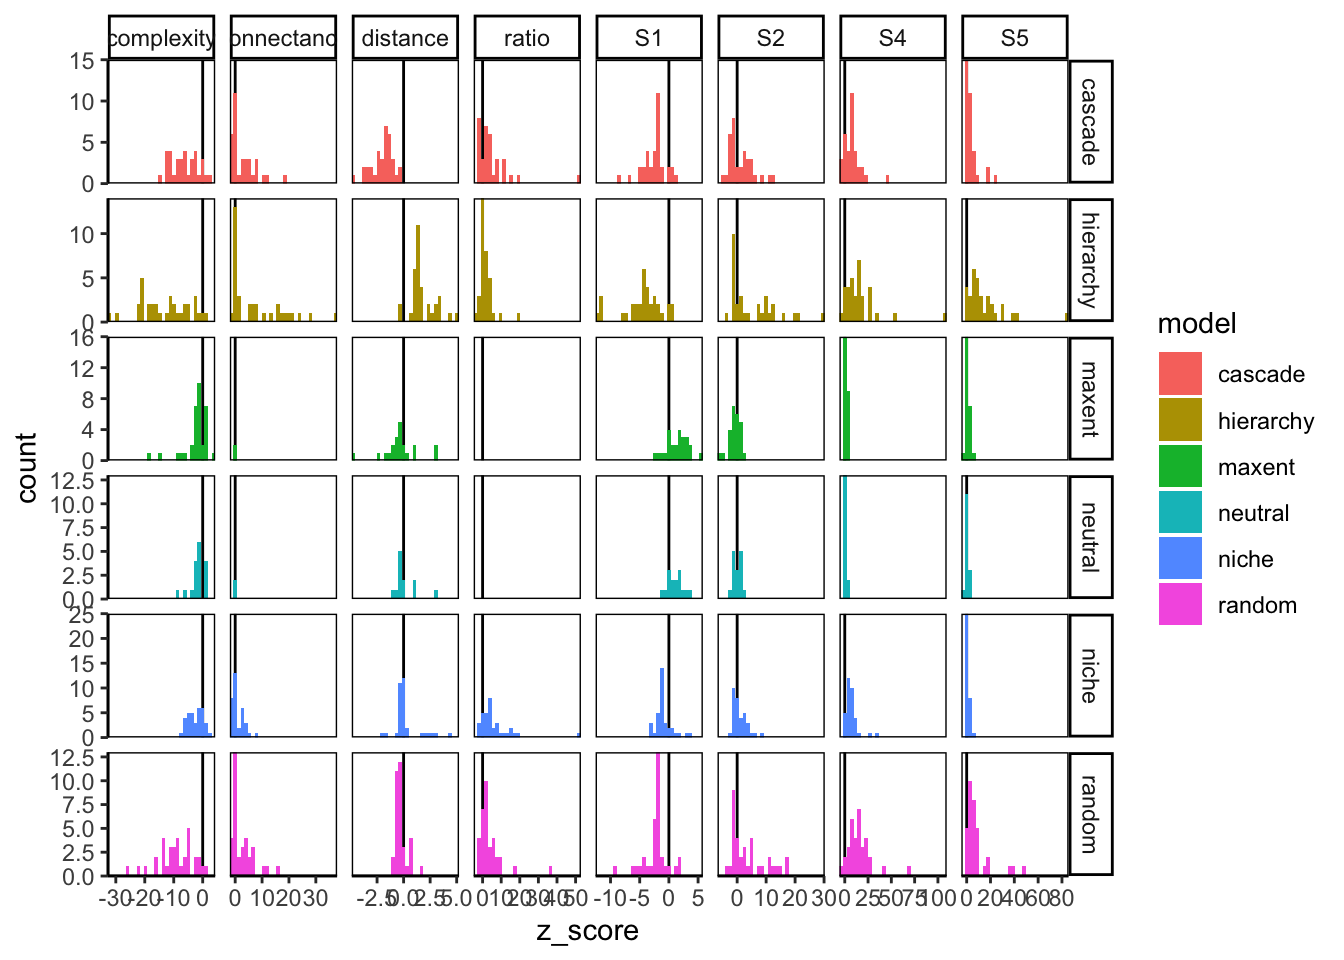

In [ ]:
#| warning: false
#| echo: false
#| label: fig-topology
#| fig-cap: "Z-scores for network summary statistics. Negative Z-scores indicate a (mean) value greater than expected. S1 - S5 represent the different motif structures identified in @stoufferEvidenceExistenceRobust2007 The magnitude of Z-score probably also tells us how 'variable'/constrained the model is..."

ggplot(df %>% 
        group_by(id, real, model)  %>% 
        reframe(x_real = real_val,
                mu_sim = mean(model_val, na.rm = TRUE),
                sd_sim = sd(model_val, na.rm = TRUE)) %>%
        mutate(z_score = ((x_real-mu_sim)/sd_sim)) %>%
        distinct()) +
    geom_vline(aes(xintercept = 0)) +
    geom_histogram(aes(x = z_score,
                    fill = model),
                colour = "#ffffff00") +
    facet_grid(rows = vars(model),
                cols = vars(real),
                scales = "free") +
    scale_size(guide = 'none') +
    coord_cartesian(expand = FALSE) +
    theme_classic() +
    theme(panel.border = element_rect(colour = 'black',
                                      fill = "#ffffff00"))

## References